In [18]:
import matplotlib.pyplot as plt
import numpy as np
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

"first, let's define some basic functions"
pi= np.pi
def sqrt(x): return np.sqrt(x)
def exp(x): return np.exp(x)
def sin(x): return np.sin(x)
def cos(x): return np.cos(x)
def log(x): return np.log(x)
def poly0(x): return (pow(x,3)/6.) + (pow(x,4)/8.0)

In [19]:
"""
*****************************************
*****************************************
  solving linear differential equations
*****************************************
*****************************************
"""

def lin_diff_eq(g, f0, s, a):

    """
    this solves the diff. eq. df/dx = g(x) by discretizing it
    (f(x+a) - f(x-a))/2a = g(x)
    f(x+a) = f(x-a) + 2*a*g(x)

    or equivalently

    f(x+2 a) = f(x) + 2*a*g(x+a)

    we put the list of points into fs

    we initiate this with
    the initial value of f, which is f0 = f(s[0])

    """
    fs=[f0]
    "note in this loop, we skip over the first element"
    for i0 in range(1,len(s)):
        "we grab the previous term in the list"
        f0 = fs[-1]
        '''we need the derivative at x+a,
        since s[i0] =  x+2*a
        we can use the fact that x+a = s[i0]-a'''
        df=g(s[i0]-a)*2*a
        "we add these together"
        fs.append(f0 + df)
    return fs

In [20]:
def master_diff_eq():

    plt.figure(figsize=(9.0,5))
    plt.subplot(211)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.ylabel(ylabel1,size=25)

    plt.plot(xs, ydata1, color='r')

    plt.errorbar(x2, ydata2,  markersize=8,fmt='o',color='g',mfc='white',mec='g', elinewidth=2, capsize=4, mew=1.4)

    plt.axvline(x=0,color='k',linewidth=1)

    plt.subplot(212)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.axhline(y=0,color='k',linewidth=1)
    plt.axvline(x=0,color='k',linewidth=1)

    plt.ylabel(ylabel2,size=20)
    plt.plot(xs, ydata3, color='g')

    plt.xlabel(xlabel0,size=20, position=(1,1.2))



a 0.001


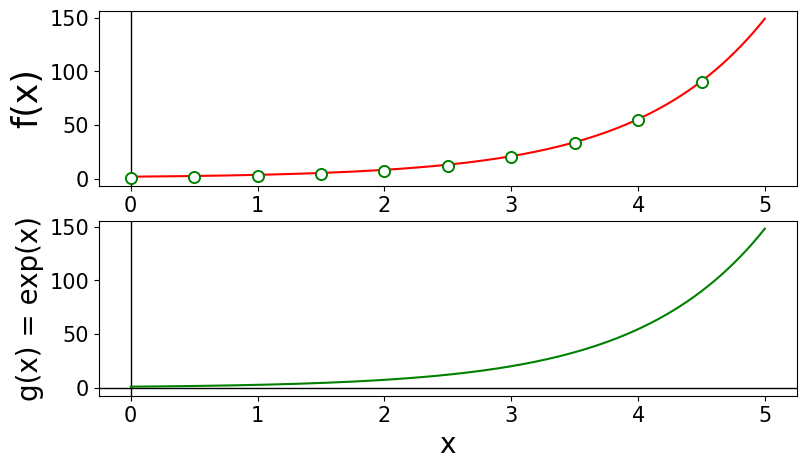

In [21]:
a = pow(10,-3)
s=np.arange(0,5, 2*a)
x2=np.arange(0,5, .5)

print("a",a)
"""
******************************
******************************
g(x) = exp(x)
f(x) = exp(x)
******************************
******************************
"""

fs=lin_diff_eq(exp,2,s,a)
ydata1=fs
ydata2=exp(x2)
ydata3=exp(s)
ylabel1="f(x)"
ylabel2="g(x) = exp(x)"
xlabel0="x"
master_diff_eq()

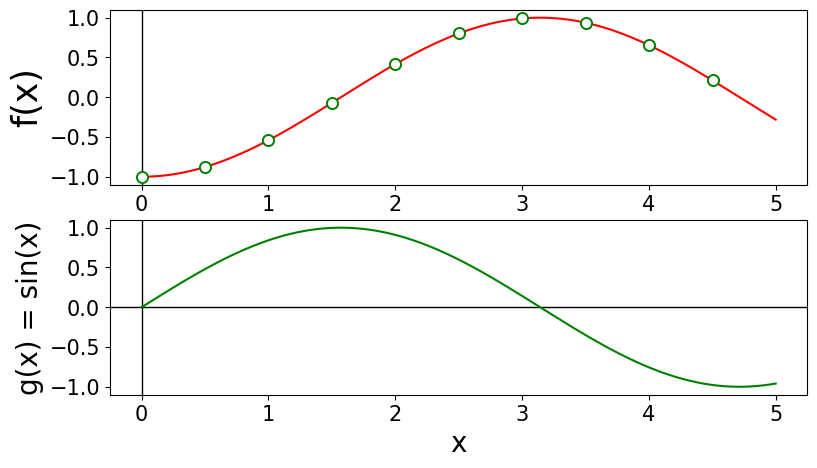

In [24]:
"""
******************************
******************************
    g(x) = sin(x)
    f(x) = -cos(x)
******************************
******************************
"""

fs=lin_diff_eq(sin,-1,s,a)
ydata1=fs
ydata2=-cos(x2)
ydata3=sin(s)
ylabel1="f(x)"
ylabel2="g(x) = sin(x)"
xlabel0="x"
master_diff_eq()

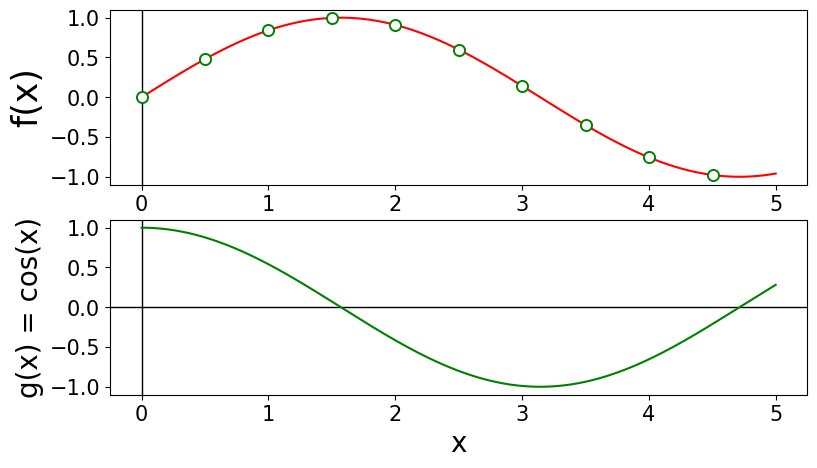

In [25]:
"""
******************************
******************************
    g(x) = cos(x)
    f(x) = sin(x)
******************************
******************************
"""
fs=lin_diff_eq(cos,0,s,a)
ydata1=fs
ydata2=sin(x2)
ydata3=cos(xs)
ylabel1="f(x)"
ylabel2="g(x) = cos(x)"
xlabel0="x"
master_diff_eq()

In [26]:
"""
*****************************************
*****************************************
  solving second differential equations
*****************************************
*****************************************
"""

def second_diff_eq(h, f0, g0, ts, a):

    """
    this solves the diff. eq. d^2f/dx^2 = h(x) by discretizing
    re-writting it as a coupled linear equations

    dg/dt = h(t)
    df/dt = g(t)

    g(t + 2*a) = g(t) + 2 * a * h(t + a)
    f(t + 2*a) = f(t) + 2 * a * g(t + a)

    we put the list of points into fs, gs

    we initiate this with
    the initial value of f, which is f0 = f(ts[0])
    the initial value of g, which is g0 = g(ts[0])

    note, we need to calculate g(t + a), but we have g(t + 2*a) and g(t)
    we will estimate this with the average of these two, which we will call

    gbar = ( g(t + 2*a) + g(t) ) / 2
    """

    fs=[f0]
    gs=[g0]

    "note in this loop, we skip over the first element"
    for i0 in range(1,len(ts)):
        "we start with g(t): we grab the previous term in the list"
        g0 =gs[-1]
        "the shift in g"
        dg =h(ts[i0]+a)*2*a
        gs.append(g0+dg)
        "next we calculate f(t): we grab the previous term in the list"
        f0 = fs[-1]
        "we estimate g(t+a) with the average of the last two point in gs"
        gbar =(gs[-1]+gs[-2])/2
        df =(gbar)*2*a+f0
        "we add these together"
        fs.append(f0 + df)
    return fs, gs

In [27]:
def master_sec_diff_eq():
    plt.figure(figsize=(9.0,8))

    "x(t) plots"
    plt.subplot(311)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.ylabel(ylabel1,size=25)

    plt.plot(ts, ydata1, color='r')
    plt.errorbar(t2, ydata2,  markersize=8,fmt='o',color='g',mfc='white',mec='g', elinewidth=2, capsize=4, mew=1.4)

    plt.axvline(x=0,color='k',linewidth=1)

    "v(t) plots"
    plt.subplot(312)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.axvline(x=0,color='k',linewidth=1)

    plt.ylabel(ylabel2,size=20)
    plt.plot(ts, ydata3, color='r')
    plt.errorbar(t2, ydata4,  markersize=8,fmt='o',color='g',mfc='white',mec='g', elinewidth=2, capsize=4, mew=1.4)

    "a plots"
    plt.subplot(313)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    plt.axhline(y=0,color='k',linewidth=1)
    plt.axvline(x=0,color='k',linewidth=1)

    plt.ylabel(ylabel3,size=20)
    plt.plot(ts, ydata5, color='b')

    plt.xlabel(xlabel0,size=20, position=(1,1.2))

a 0.001


/usr/local/lib/python3.11/dist-packages/matplotlib/ticker.py:2176: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


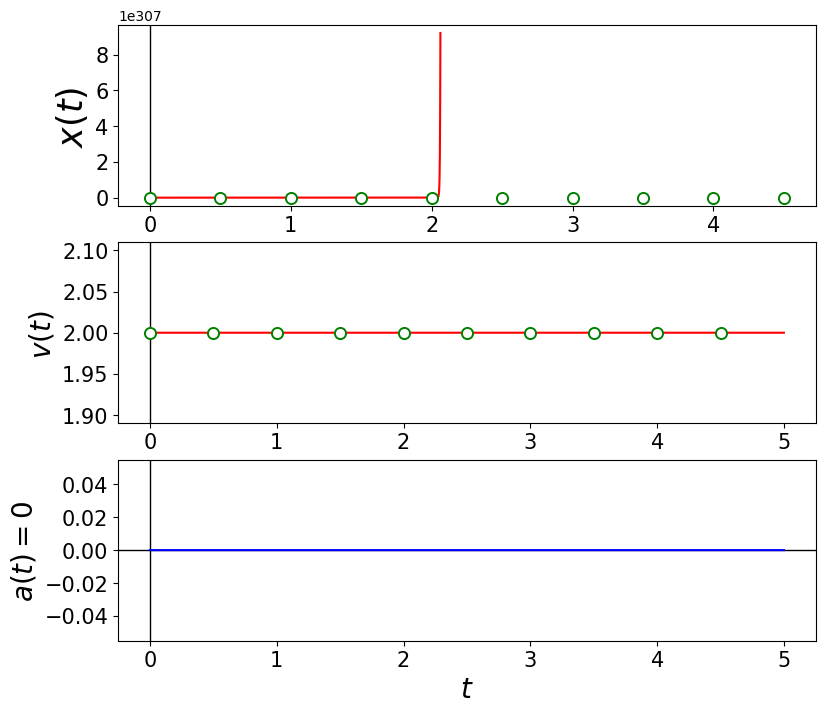

In [28]:
a = pow(10,-3)
ts=np.arange(0,5, 2*a)
t2=np.arange(0,5, .5)
print("a",a)
def x_func(t, x0, v0, a0):
    x1 = v0 * t
    x2 = a0 * pow(t,2)/2.0
    return x0 + x1 + x2
def v_func(t, v0, a0):
    return v0 + a0 * t
"""
******************************
******************************
a(t) = 0
x(t) = v0*t
******************************
******************************
"""
x0, v0 = 0, 2
def a_func(t):
  return 0
s,vs=second_diff_eq(a_func,x0,v0,ts,a)
ydata1=s
ydata2=x_func(t2, x0, v0, a_func(ts))
ydata3=vs
ydata4=v_func(t2, v0, a_func(ts))
ydata5=a_func(ts)*np.ones(len(ts))
ylabel1=r'$x(t) $ '
ylabel2=r'$v(t)$ '
ylabel3=r'$a(t) = 0$ '
xlabel0=r'$t$'

master_sec_diff_eq()

In [41]:
"""
******************************
******************************
    a(t) = -9.8
    x(t) = v0*t + a t^2/2
******************************
******************************
"""

x0, v0 =0,6
def a_func(t): return -9.8
xs, vs = second_diff_eq(a_func,x0,v0,ts,a)
ydata1 = xs
ydata2 = x_func(t2, x0, v0, a_func(ts))
ydata3 = vs
ydata4 = v_func(t2, v0, a_func(ts))
ydata5 = a_func(ts)*np.ones(len(ts))
ylabel1 = r'$x(t) $ '
ylabel2 = r'$v(t)$ '
ylabel3 = r'$a(t) = -9.8$ '
xlabel0 = r'$t$'

master_sec_diff_eq()

/tmp/ipython-input-718392867.py:49: RuntimeWarning: overflow encountered in scalar add
  fs.append(f0 + df)


ValueError: operands could not be broadcast together with shapes (2500,) (10,) 